In [1]:
import gc
import time
import random
import graphviz
import warnings
import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import pydot_ng as pydot
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, Sequential 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

tensorflow.random.set_seed(2020)
np.random.seed(2020)
random.seed(2020)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
data = pd.read_pickle('cleandata/fe_clean1345.pkl')
droptime = ['入口日期及时间','出口日期及时间']
data.drop(droptime, axis=1, inplace=True)
display(data.head(3))

,入口站编号,出口站编号,车型代码,里程,总轴数,轴型及轴重,车货总重,限重,超限率,是否绿色通道车辆代码,是否ETC车道代码,行驶时间,通过车道的平均速度(km/h),entryweek,entryday,entryhour,exitweek,exitday,exithour,车型代码超限率均值,车型代码超限率中位数,车型代码超限率最小值,车型代码超限率最大值,车型代码超限率标准差,车型代码行驶时间均值,车型代码行驶时间中位数,车型代码行驶时间最小值,车型代码行驶时间最大值,车型代码行驶时间标准差,车型代码平均速度均值,车型代码平均速度中位数,车型代码平均速度最小值,车型代码平均速度最大值,车型代码平均速度标准差,出口站编号平均速度均值,出口站编号平均速度中位数,出口站编号平均速度最小值,出口站编号平均速度最大值,出口站编号平均速度标准差,入口站编号平均速度均值,入口站编号平均速度中位数,入口站编号平均速度最小值,入口站编号平均速度最大值,入口站编号平均速度标准差,出口站编号行驶时间均值,出口站编号行驶时间中位数,出口站编号行驶时间最小值,出口站编号行驶时间最大值,出口站编号行驶时间标准差,入口站编号行驶时间均值,入口站编号行驶时间中位数,入口站编号行驶时间最小值,入口站编号行驶时间最大值,入口站编号行驶时间标准差,出口站编号超限率均值,出口站编号超限率中位数,出口站编号超限率最小值,出口站编号超限率最大值,出口站编号超限率标准差,入口站编号超限率均值,入口站编号超限率中位数,入口站编号超限率最小值,入口站编号超限率最大值,入口站编号超限率标准差,出口站编号车货总重均值,出口站编号车货总重中位数,出口站编号车货总重最小值,出口站编号车货总重最大值,出口站编号车货总重标准差,入口站编号车货总重均值,入口站编号车货总重中位数,入口站编号车货总重最小值,入口站编号车货总重最大值,入口站编号车货总重标准差,车型代码车货总重均值,车型代码车货总重中位数,车型代码车货总重最小值,车型代码车货总重最大值,车型代码车货总重标准差,入口站编号平均速度离差,出口站编号平均速度离差,入口站编号行驶时间离差,出口站编号行驶时间离差,入口站编号超限率离差,出口站编号超限率离差,入口站编号车货总重离差,出口站编号车货总重离差,车型代码平均速度离差,车型代码行驶时间离差,车型代码超限率离差,车型代码车货总重离差
0,18,313,1,118.189,2,23,1450,14000,-89.64,0,0,4724,1.501130,2,11,16,2,11,17,-88.4375,-88.9375,-98.25,129.375,2.697266,4108.0,1734.0,18.0,-1.0,8296.0,1.766602,1.732422,0.0,58.65625,0.733398,1.426758,1.459961,0.073853,2.617188,0.371826,2.425781,2.189453,0.014397,8.734375,1.016602,4604.0,3268.0,411.0,59616.0,5900.0,2922.0,919.0,95.0,-1.0,4484.0,-80.8125,-87.500,-94.4375,45.28125,18.328125,-83.75000,-88.5000,-97.5000,78.8125,15.835938,3774.0,1750.0,850.0,50752.0,6132.0,2876.0,1620.0,350.0,54496.0,4596.0,1624.0,1550.0,300.0,60736.0,447.75,0.502418,1.042029,8.244071,7.283448,0.131028,0.760806,5.135798,5.703782,0.793508,8.003029,-0.353110,4.605170
1,330,306,1,64.143,2,23,1450,14000,-89.64,0,0,2414,1.594275,2,11,16,2,11,17,-88.4375,-88.9375,-98.25,129.375,2.697266,4108.0,1734.0,18.0,-1.0,8296.0,1.766602,1.732422,0.0,58.65625,0.733398,1.499023,1.404297,0.044281,3.777344,0.556152,1.218750,1.245117,0.011101,2.544922,0.397949,5264.0,2856.0,913.0,-1.0,7768.0,11064.0,9056.0,272.0,-1.0,10864.0,-79.3750,-87.875,-94.6250,124.12500,25.234375,-45.96875,-79.0625,-94.3125,72.9375,46.218750,4064.0,1700.0,750.0,62752.0,7696.0,21440.0,3124.0,800.0,-1.0,22672.0,1624.0,1550.0,300.0,60736.0,447.75,1.417873,1.209223,-1.000000,-1.000000,2.358729,0.568151,7.422971,5.521461,0.870971,6.522093,-0.353110,4.605170
2,325,306,1,54.720,2,23,1750,14000,-87.50,0,0,1969,1.667445,2,11,16,2,11,17,-88.4375,-88.9375,-98.25,129.375,2.697266,4108.0,1734.0,18.0,-1.0,8296.0,1.766602,1.732422,0.0,58.65625,0.733398,1.499023,1.404297,0.044281,3.777344,0.556152,1.468750,1.380859,0.011719,3.812500,0.565918,5264.0,2856.0,913.0,-1.0,7768.0,3910.0,2152.0,525.0,-1.0,7612.0,-79.3750,-87.875,-94.6250,124.12500,25.234375,-83.18750,-88.3125,-94.6250,55.0000,17.687500,4064.0,1700.0,750.0,62752.0,7696.0,2936.0,1640.0,750.0,56800.0,4984.0,1624.0,1550.0,300.0,60736.0,447.75,1.331873,1.301020,-1.000000,-1.000000,-0.207639,-0.980829,4.700480,3.912023,0.937090,5.459586,0.362905,5.298317


In [3]:
cat_feature = ['入口站编号', '出口站编号', '车型代码', '轴型及轴重', 
               'entryweek', 'entryday', 'entryhour', 'exitweek', 'exitday', 'exithour']

time_feature = ['entryweek', 'entryday', 'entryhour', 'exitweek', 'exitday', 'exithour']

base_feature = ['里程', '总轴数', '车货总重', '限重', '超限率', '是否ETC车道代码', '行驶时间', '通过车道的平均速度(km/h)']

target = '是否绿色通道车辆代码'

real_feature = [i for i in data.columns if i not in cat_feature and i != target and i not in base_feature]

In [4]:
print("number of features:.{}".format(len(real_feature + base_feature + real_feature)))
print(real_feature)

number of features:.152
['车型代码超限率均值', '车型代码超限率中位数', '车型代码超限率最小值', '车型代码超限率最大值', '车型代码超限率标准差', '车型代码行驶时间均值', '车型代码行驶时间中位数', '车型代码行驶时间最小值', '车型代码行驶时间最大值', '车型代码行驶时间标准差', '车型代码平均速度均值', '车型代码平均速度中位数', '车型代码平均速度最小值', '车型代码平均速度最大值', '车型代码平均速度标准差', '出口站编号平均速度均值', '出口站编号平均速度中位数', '出口站编号平均速度最小值', '出口站编号平均速度最大值', '出口站编号平均速度标准差', '入口站编号平均速度均值', '入口站编号平均速度中位数', '入口站编号平均速度最小值', '入口站编号平均速度最大值', '入口站编号平均速度标准差', '出口站编号行驶时间均值', '出口站编号行驶时间中位数', '出口站编号行驶时间最小值', '出口站编号行驶时间最大值', '出口站编号行驶时间标准差', '入口站编号行驶时间均值', '入口站编号行驶时间中位数', '入口站编号行驶时间最小值', '入口站编号行驶时间最大值', '入口站编号行驶时间标准差', '出口站编号超限率均值', '出口站编号超限率中位数', '出口站编号超限率最小值', '出口站编号超限率最大值', '出口站编号超限率标准差', '入口站编号超限率均值', '入口站编号超限率中位数', '入口站编号超限率最小值', '入口站编号超限率最大值', '入口站编号超限率标准差', '出口站编号车货总重均值', '出口站编号车货总重中位数', '出口站编号车货总重最小值', '出口站编号车货总重最大值', '出口站编号车货总重标准差', '入口站编号车货总重均值', '入口站编号车货总重中位数', '入口站编号车货总重最小值', '入口站编号车货总重最大值', '入口站编号车货总重标准差', '车型代码车货总重均值', '车型代码车货总重中位数', '车型代码车货总重最小值', '车型代码车货总重最大值', '车型代码车货总重标准差', '入口站编号平均速度离差', '出口站编号平均速度离差', '入口站编号行驶时间离差', '出口站编号行驶时间离差', '入

In [5]:
X = data[base_feature + cat_feature + real_feature]
y = data[target]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=2020)
print("train length: {}, test length: {}".format(len(xtrain), len(xtest)))

train length: 581696, test length: 581697


In [6]:
del data;gc.collect()

80

### Model 1

In [7]:
trn_cat = xtrain[cat_feature]
tst_cat = xtest[cat_feature]

trn_real = xtrain[base_feature + real_feature]
tst_real = xtest[base_feature + real_feature]

In [8]:
sds_real = StandardScaler()
trn_real = sds_real.fit_transform(trn_real)
tst_real = sds_real.transform(tst_real)

In [9]:
input_catLen = trn_cat.values.shape[1]
input_numLen = trn_real.shape[1]

size_embedding = 5000

In [10]:
numerical_channel = Input(shape=(input_numLen,))
dense = Dense(256, activation='relu')(numerical_channel)
dense = Dense(128, activation='relu')(dense)
dense = Dense(64, activation='relu')(dense)
#dense = Dense(32, activation='relu')(dense)
flat1 = Dense(32, activation='relu')(dense)

categorical_channel  = Input(shape=(input_catLen,))
embedding = Embedding(size_embedding, 36)(categorical_channel)
conv1d = Conv1D(filters=32, kernel_size=7, activation='relu')(embedding)
dropout = Dropout(0.2)(conv1d)
maxpooling1d = MaxPooling1D(pool_size=2)(dropout)
flat2 = Flatten()(maxpooling1d)

concatlayer = concatenate([flat1, flat2])

dense1 = Dense(256, activation='relu')(concatlayer)
dense2 = Dense(16, activation='relu')(dense1)
outputs = Dense(1, activation='sigmoid')(dense2)
model = Model(inputs=[numerical_channel, categorical_channel], outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 10, 36)       180000      input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          20736       input_1[0][0]                    
______________________________________________________________________________________________

In [11]:
Callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC()])

In [12]:
batch_size = 512
st = time.time()
model.fit([trn_real, trn_cat.values], ytrain, batch_size=batch_size, verbose=1, epochs=20, validation_split=0.2, callbacks=Callbacks)
ed = time.time()
print("time consume: {}".format(ed - st))

Epoch 1/20
909/909 [==============================] - 4s 5ms/step - loss: 0.0435 - auc: 0.9606 - val_loss: 0.0326 - val_auc: 0.9739
Epoch 2/20
909/909 [==============================] - 4s 5ms/step - loss: 0.0300 - auc: 0.9796 - val_loss: 0.0301 - val_auc: 0.9782
Epoch 3/20
909/909 [==============================] - 4s 5ms/step - loss: 0.0281 - auc: 0.9815 - val_loss: 0.0307 - val_auc: 0.9716
Epoch 4/20
909/909 [==============================] - 4s 5ms/step - loss: 0.0270 - auc: 0.9828 - val_loss: 0.0284 - val_auc: 0.9801
Epoch 5/20
909/909 [==============================] - 4s 4ms/step - loss: 0.0256 - auc: 0.9856 - val_loss: 0.0279 - val_auc: 0.9808
Epoch 6/20
909/909 [==============================] - 4s 4ms/step - loss: 0.0246 - auc: 0.9856 - val_loss: 0.0281 - val_auc: 0.9767
Epoch 7/20
909/909 [==============================] - 4s 5ms/step - loss: 0.0233 - auc: 0.9867 - val_loss: 0.0284 - val_auc: 0.9713
time consume: 32.13468360900879


In [13]:
ypred = model.predict([tst_real, tst_cat.values], batch_size=batch_size, verbose=1)
print(ypred)

1137/1137 [==============================] - 1s 1ms/step
[[9.8503378e-08]
 [1.1539442e-09]
 [2.8432147e-11]
 ...
 [1.0422601e-07]
 [1.6523907e-09]
 [5.7469612e-10]]


In [14]:
print("auc score:", roc_auc_score(ytest,ypred))

auc score: 0.987884738471527


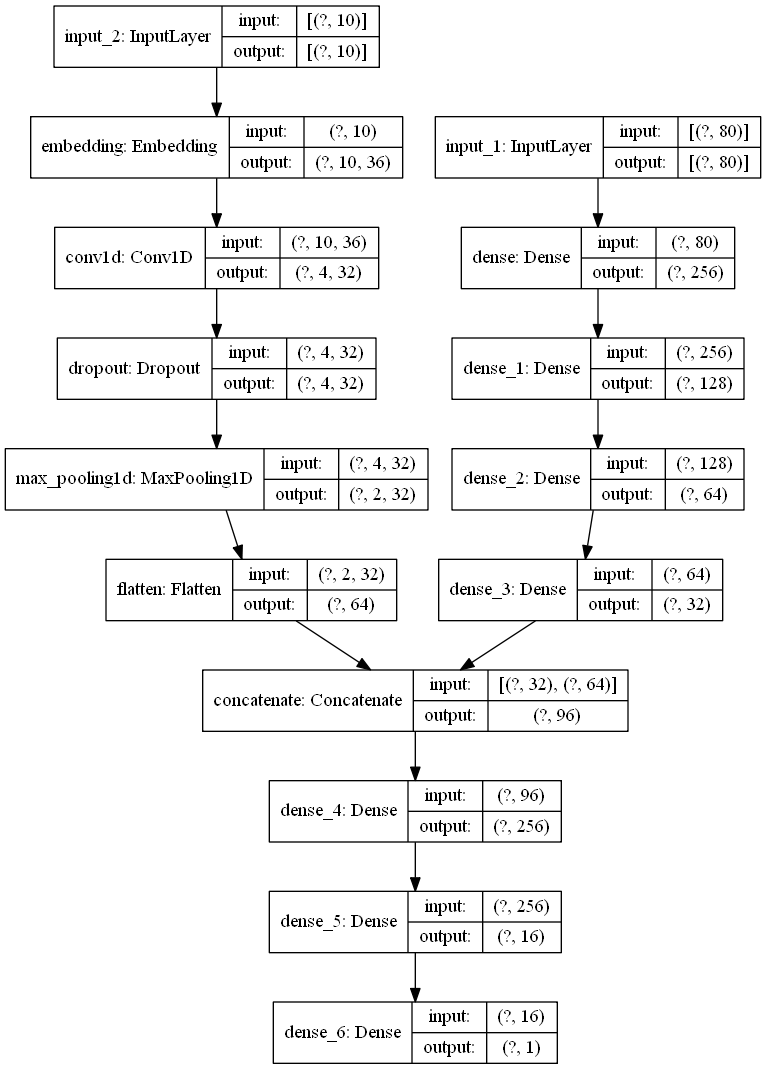

In [15]:
import os
dot_img_file = 'model_keras.png'
os.environ["PATH"] += os.pathsep +'C:\Program Files (x86)\Graphviz2.38\bin'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [16]:
print(classification_report(ytest, np.round(ypred)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    572470
           1       0.83      0.57      0.67      9227

    accuracy                           0.99    581697
   macro avg       0.91      0.78      0.83    581697
weighted avg       0.99      0.99      0.99    581697



In [17]:
model.save('models/conv1d.h5')

### Model 2, Upsampling* add noise (please rerun to ensure the same random state)

In [18]:
import warnings
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, Sequential 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import tensorflow
tensorflow.random.set_seed(2020)
np.random.seed(2020)
random.seed(2020)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [19]:
def add_noise(data, columns, target):
    noise = data[data[target]==1].copy()
    for i in columns:
        noise[i] = noise[i] + np.random.uniform(0, 0.005)
    return noise

In [20]:
data = pd.read_pickle('cleandata/fe_clean1345.pkl')
droptime = ['入口日期及时间','出口日期及时间']
data.drop(droptime, axis=1, inplace=True)

cat_feature = ['入口站编号', '出口站编号', '车型代码', '轴型及轴重', 'entryweek', 'entryday', 'entryhour', 'exitweek', 'exitday', 'exithour']
time_feature = ['entryweek', 'entryday', 'entryhour', 'exitweek', 'exitday', 'exithour']
base_feature = ['里程', '总轴数', '车货总重', '限重', '超限率', '是否ETC车道代码', '行驶时间', '通过车道的平均速度(km/h)']
target = '是否绿色通道车辆代码'
real_feature = [i for i in data.columns if i not in cat_feature and i != target and i not in base_feature]

In [21]:
X = data[base_feature + cat_feature + real_feature]
y = data[target]

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=2020)
print("train length: {}, test length: {}".format(len(xtrain), len(xtest)))
print("True length: {}, False length: {}".format(len(ytrain[ytrain == 1]), len(ytrain[ytrain== 0])))

train length: 581696, test length: 581697
True length: 9330, False length: 572366


In [23]:
# generate noise 1
noise_df = xtrain.copy()
noise_df[target] = ytrain

noise = add_noise(noise_df, columns=real_feature, target=target)
xtrain = xtrain.append(noise[base_feature + cat_feature + real_feature])
ytrain = ytrain.append(noise[target])

# generate noise 2
noise = add_noise(data=noise_df, columns=real_feature, target=target)
xtrain = xtrain.append(noise[base_feature + cat_feature + real_feature])
ytrain = ytrain.append(noise[target])

# generate noise 3
# noise = add_noise(data=data, columns=real_feature, target=target)
# xtrain = xtrain.append(noise[base_feature + cat_feature + real_feature])
# ytrain = ytrain.append(noise[target])

print("train length: {}, test length: {}".format(len(xtrain), len(xtest)))
print("True length: {}, False length: {}".format(len(ytrain[ytrain == 1]), len(ytrain[ytrain== 0])))

train length: 600356, test length: 581697
True length: 27990, False length: 572366


In [24]:
trn_cat = xtrain[cat_feature]
tst_cat = xtest[cat_feature]

trn_real = xtrain[base_feature + real_feature]
tst_real = xtest[base_feature + real_feature]

sds_real = StandardScaler()
trn_real = sds_real.fit_transform(trn_real)
tst_real = sds_real.transform(tst_real)

input_catLen = trn_cat.values.shape[1]
input_numLen = trn_real.shape[1]

size_embedding = 5000

numerical_channel = Input(shape=(input_numLen,))
dense = Dense(256, activation='relu')(numerical_channel)
dense = Dense(128, activation='relu')(dense)
dense = Dense(64, activation='relu')(dense)
#dense = Dense(32, activation='relu')(dense)
flat1 = Dense(32, activation='relu')(dense)

categorical_channel  = Input(shape=(input_catLen,))
embedding = Embedding(size_embedding, 36)(categorical_channel)
conv1d = Conv1D(filters=32, kernel_size=7, activation='relu')(embedding)
dropout = Dropout(0.2)(conv1d)
maxpooling1d = MaxPooling1D(pool_size=2)(dropout)
flat2 = Flatten()(maxpooling1d)

concatlayer = concatenate([flat1, flat2])

dense1 = Dense(256, activation='relu')(concatlayer)
dense2 = Dense(16, activation='relu')(dense1)
outputs = Dense(1, activation='sigmoid')(dense2)
model = Model(inputs=[numerical_channel, categorical_channel], outputs=outputs)


Callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC()])

batch_size = 512
model.fit([trn_real, trn_cat.values], ytrain, batch_size=batch_size, verbose=1, epochs=20, validation_split=0.2, callbacks=Callbacks)

ypred = model.predict([tst_real, tst_cat.values], batch_size=batch_size, verbose=1)
print(ypred)
print("auc score:", roc_auc_score(ytest,ypred))
print(classification_report(ytest, np.round(ypred)))

Epoch 1/20
939/939 [==============================] - 4s 5ms/step - loss: 0.0424 - auc_1: 0.9613 - val_loss: 0.2029 - val_auc_1: 0.9855
Epoch 2/20
939/939 [==============================] - 4s 4ms/step - loss: 0.0297 - auc_1: 0.9800 - val_loss: 0.1542 - val_auc_1: 0.9891
Epoch 3/20
939/939 [==============================] - 4s 4ms/step - loss: 0.0282 - auc_1: 0.9815 - val_loss: 0.1874 - val_auc_1: 0.9856
Epoch 4/20
939/939 [==============================] - 4s 5ms/step - loss: 0.0267 - auc_1: 0.9833 - val_loss: 0.1851 - val_auc_1: 0.9869
Epoch 5/20
939/939 [==============================] - 5s 5ms/step - loss: 0.0254 - auc_1: 0.9857 - val_loss: 0.2135 - val_auc_1: 0.9809
Epoch 6/20
939/939 [==============================] - 4s 5ms/step - loss: 0.0244 - auc_1: 0.9858 - val_loss: 0.1729 - val_auc_1: 0.9869
Epoch 7/20
939/939 [==============================] - 4s 5ms/step - loss: 0.0232 - auc_1: 0.9877 - val_loss: 0.2092 - val_auc_1: 0.9813
Epoch 8/20
939/939 [============================

In [25]:
model.save('models/conv1d_upsampling.h5')

In [26]:
from sklearn.externals import joblib
joblib.dump(sds_real, 'models/sds_real')

['models/sds_real']

### test outliers

In [27]:
outliers = pd.read_pickle('outliers/outliers1345.pkl')
outliers.drop(droptime, axis=1, inplace=True)

outliersX = outliers[base_feature + cat_feature + real_feature]
outliersy = outliers[target]

outlierstst_cat = outliersX[cat_feature]

outlierstst_real = outliersX[base_feature + real_feature]
outlierstst_real = sds_real.transform(outlierstst_real)

In [28]:
from sklearn.metrics import accuracy_score
outliersypred = model.predict([outlierstst_real, outlierstst_cat.values], batch_size=batch_size, verbose=1)
print(accuracy_score(outliersy, np.round(outliersypred)))

37/37 [==============================] - 0s 1ms/step
0.04150719637755377


In [29]:
np.round(outliersypred)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [30]:
outliersy

0       1
1       1
2       1
3       1
4       1
       ..
5267    1
5268    1
5269    1
5270    1
5271    1
Name: 是否绿色通道车辆代码, Length: 18551, dtype: int64